In [1]:
import pandas as pd
import random
import itertools
import datetime as dt
import matplotlib.pyplot as plt
import calendar
import numpy as np
import seaborn as sns

Downloaded data from: http://web.mta.info/developers/turnstile.html

Documentations at: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

Map of the MTA system: http://web.mta.info/maps/submap.html

In [2]:
df = pd.read_csv('clean_turnstile_data.csv')

/Users/kendra/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%Y-%m-%d %H:%M:%S')
df['DATE'] = pd.to_datetime(df['DATE'])

In [175]:
df.set_index('DATETIME', inplace=True)

In [186]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

Resample dataframe every 4 hours:

In [197]:
df2 = df.groupby(['STATION']).resample(rule='4H').sum().reset_index()

In [198]:
df2.drop(['ENTRIES','EXITS'], axis=1, inplace=True)

Add Day Of Week of column

In [202]:
df2['DAY_OF_WEEK'] = df2['DATETIME'].dt.weekday

In [306]:
df2.head()

,STATION,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,DAY_OF_WEEK
0,1 AV,2018-05-19 00:00:00,1687.0,1107.0,5
1,1 AV,2018-05-19 04:00:00,673.0,1041.0,5
2,1 AV,2018-05-19 08:00:00,2864.0,3578.0,5
3,1 AV,2018-05-19 12:00:00,4839.0,5416.0,5
4,1 AV,2018-05-19 16:00:00,4982.0,6319.0,5


In [220]:
df3 = df2.copy()

In [296]:
df3['DATE'] = pd.to_datetime(df3['DATETIME'].dt.date)
df3['TIME'] = df3['DATETIME'].dt.time

In [303]:
df3['TOTAL'] = df3['ENTRY_DIFFS'] + df3['EXIT_DIFFS']

In [304]:
df3.head()

,STATION,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,DAY_OF_WEEK,DATE,TIME,TOTAL
0,1 AV,2018-05-19 00:00:00,1687.0,1107.0,5,2018-05-19,00:00:00,2794.0
1,1 AV,2018-05-19 04:00:00,673.0,1041.0,5,2018-05-19,04:00:00,1714.0
2,1 AV,2018-05-19 08:00:00,2864.0,3578.0,5,2018-05-19,08:00:00,6442.0
3,1 AV,2018-05-19 12:00:00,4839.0,5416.0,5,2018-05-19,12:00:00,10255.0
4,1 AV,2018-05-19 16:00:00,4982.0,6319.0,5,2018-05-19,16:00:00,11301.0


In [305]:
df3.to_csv('resampled_turnstile_data.csv')

### Sum over all data

to get a list of high-volume stations

In [217]:
grp2 = df2.groupby(['STATION'])['ENTRY_DIFFS','EXIT_DIFFS'].sum().reset_index()

In [230]:
grp2.head()

,STATION,ENTRY_DIFFS,EXIT_DIFFS
0,1 AV,571582.0,624905.0
1,103 ST,804844.0,543799.0
2,103 ST-CORONA,503029.0,365677.0
3,104 ST,71630.0,32287.0
4,110 ST,278100.0,232013.0


In [231]:
exit_high = list(grp2.sort_values('EXIT_DIFFS').tail(15)['STATION'])
entry_high = list(grp2.sort_values('ENTRY_DIFFS').tail(15)['STATION'])
highest_vol = set(exit_high + entry_high)

In [232]:
len(highest_vol)

16

In [233]:
highest_vol

{'125 ST',
 '14 ST-UNION SQ',
 '23 ST',
 '34 ST-HERALD SQ',
 '34 ST-PENN STA',
 '42 ST-PORT AUTH',
 '47-50 STS ROCK',
 '59 ST',
 '59 ST COLUMBUS',
 '86 ST',
 '96 ST',
 'CANAL ST',
 'FLUSHING-MAIN',
 'FULTON ST',
 'GRD CNTRL-42 ST',
 'TIMES SQ-42 ST'}

### Sum by Date

To make sure there are no anomalies on a certain day

In [259]:
grp3 = df3.groupby(['STATION','DATE'])['ENTRY_DIFFS','EXIT_DIFFS'].sum().reset_index()

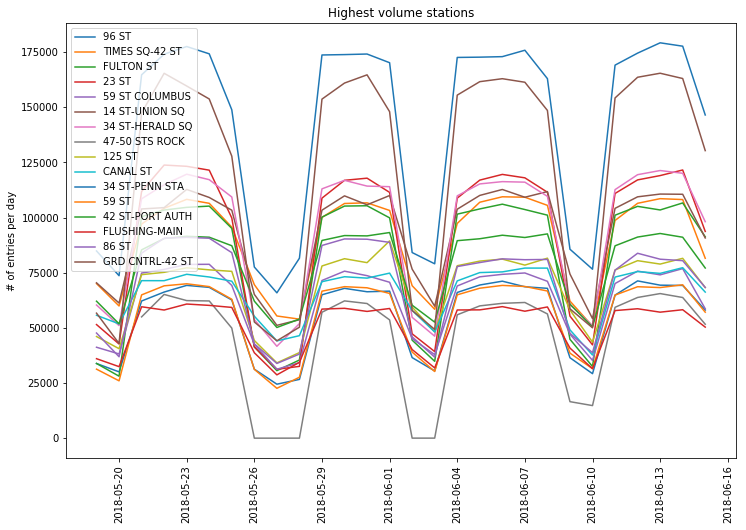

In [260]:
fig, ax = plt.subplots(figsize=[12,8])

for s in highest_vol:
    dum_df = grp3[grp3['STATION'] == s]
    xs = dum_df['DATE']
#     week_start = xs.iloc[0].strftime('%Y-%m-%d')
    plt.plot(xs, dum_df['ENTRY_DIFFS'], label=s)
#     xticklocs = ax.get_xticks()
#     plt.xticks(xticklocs, x_labels)
    plt.xticks(rotation=90)
    plt.legend()
    plt.ylabel('# of entries per day')
    plt.title('Highest volume stations');

### Average by Day of week

In [215]:
grp1 = df2.groupby(['STATION', 'DAY_OF_WEEK'])['ENTRY_DIFFS','EXIT_DIFFS'].mean().reset_index()

In [216]:
grp1.head()

,STATION,DAY_OF_WEEK,ENTRY_DIFFS,EXIT_DIFFS
0,1 AV,0,3232.125000,3538.833333
1,1 AV,1,3656.083333,4020.000000
2,1 AV,2,3868.250000,4135.458333
3,1 AV,3,3845.500000,4150.708333
4,1 AV,4,3930.260870,4244.608696


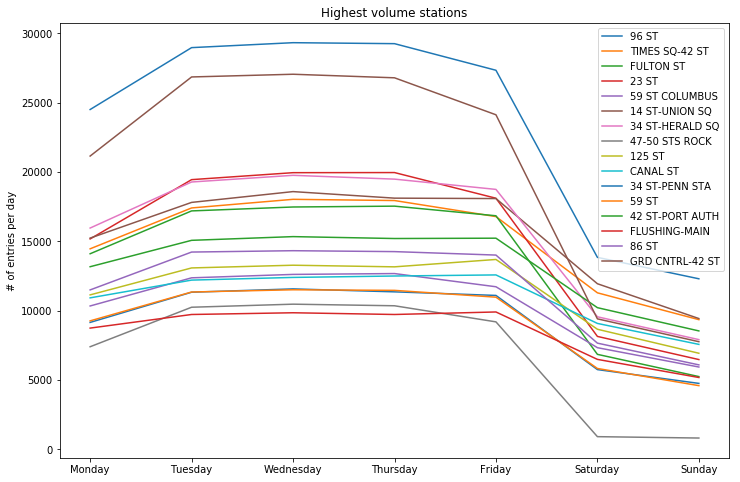

In [236]:
fig, ax = plt.subplots(figsize=[12,8])

for s in highest_vol:
    dum_df = grp1[grp1['STATION'] == s]
    xs = dum_df['DAY_OF_WEEK']
#     week_start = xs.iloc[0].strftime('%Y-%m-%d')
    plt.plot(xs, dum_df['ENTRY_DIFFS'], label=s)

# xticklocs = ax.get_xticks()
plt.xticks(np.arange(7), x_labels)
# plt.xticks(rotation=90)
plt.legend()
plt.ylabel('# of entries per day')
plt.title('Highest volume stations');

### Heatmap: volume of traffic by day of week & time of day, for a given station

In [261]:
def heatmap_data_by_day(s, data_col, year, month, day):
    '''Given:
        station key s 
        data_col (e.g. 'ENTRY_DIFFS')
        date: year, month, day
    Returns 
        Dataframe summed over that date, for that station, from that data_col'''
    d = dt.datetime(year, month, day)
    dum_df = df3[(df3['DATE'] == d) & (df3['STATION'] == s)]
#     return dum_df.groupby('DATETIME')[data_col].sum()
    return dum_df.groupby('DATETIME')[data_col].sum()

# ** Work in Progress below here **

In [261]:
def heatmap_data_by_dow(s, data_col, dow):
    '''Given:
        station key s 
        data_col (e.g. 'ENTRY_DIFFS')
        dow (0-6, with 0 being Monday)
    Returns 
        Dataframe summed over that date, for that station, from that data_col'''
#     d = dt.datetime(year, month, day)
    dum_df = df3[(df3['DAY_OF_WEEK'] == dow) & (df3['STATION'] == s)]
#     return dum_df.groupby('DATETIME')[data_col].sum()
    return dum_df.groupby('DATETIME')[data_col].sum()

In [63]:
s = grp1.loc[50,'STATION']
dum_df = grp1[grp1['STATION'] == s]

In [239]:
# index 1 = a station that doesn't have neat 0, 4, 8, 12:00 timepoints for 5/19/18
# same with index 2
test_key = list(highest_vol)[0:1][0]
test_key

'96 ST'

In [246]:
s = test_key
d = dt.datetime(2018, 5, 19)
dum_df = df[(df['DATE'] == d) & (df['STATION'] == s)]
dum_df.groupby('DATETIME')['ENTRY_DIFFS'].sum()

DATETIME
2018-05-19 00:00:00      15.0
2018-05-19 01:00:00     522.0
2018-05-19 04:00:00      76.0
2018-05-19 05:00:00    2764.0
2018-05-19 08:00:00     427.0
2018-05-19 09:00:00    7861.0
2018-05-19 12:00:00     592.0
2018-05-19 13:00:00    8928.0
2018-05-19 16:00:00     658.0
2018-05-19 17:00:00    8183.0
2018-05-19 20:00:00     185.0
2018-05-19 21:00:00    3635.0
Name: ENTRY_DIFFS, dtype: float64

In [298]:
s = test_key
d = dt.datetime(2018, 5, 19)
dum_df = df3[(df3['DATE'] == d) & (df3['STATION'] == s)]
dum_df.head()
# dum_df.groupby('DATETIME')['ENTRY_DIFFS'].sum()

,STATION,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,DAY_OF_WEEK,DATE,TIME
18667,96 ST,2018-05-19 00:00:00,537.0,1132.0,5,2018-05-19,00:00:00
18668,96 ST,2018-05-19 04:00:00,2840.0,2518.0,5,2018-05-19,04:00:00
18669,96 ST,2018-05-19 08:00:00,8288.0,5873.0,5,2018-05-19,08:00:00
18670,96 ST,2018-05-19 12:00:00,9520.0,7941.0,5,2018-05-19,12:00:00
18671,96 ST,2018-05-19 16:00:00,8841.0,6609.0,5,2018-05-19,16:00:00


In [273]:
heatmap_data_by_day(s, 'ENTRY_DIFFS', 2018, 6, 15)

DATETIME
2018-06-15 00:00:00      530.0
2018-06-15 04:00:00    11157.0
2018-06-15 08:00:00    14993.0
2018-06-15 12:00:00    15458.0
2018-06-15 16:00:00    15942.0
Name: ENTRY_DIFFS, dtype: float64

In [285]:
hm_data = [heatmap_data_by_day(s, 'ENTRY_DIFFS', 2018, 5, d) for d in range(19,26)]
# gc_hmdat

In [291]:
hm_data

[DATETIME
 2018-05-19 00:00:00     537.0
 2018-05-19 04:00:00    2840.0
 2018-05-19 08:00:00    8288.0
 2018-05-19 12:00:00    9520.0
 2018-05-19 16:00:00    8841.0
 2018-05-19 20:00:00    3820.0
 Name: ENTRY_DIFFS, dtype: float64, DATETIME
 2018-05-20 00:00:00     455.0
 2018-05-20 04:00:00    2053.0
 2018-05-20 08:00:00    7562.0
 2018-05-20 12:00:00    9417.0
 2018-05-20 16:00:00    7081.0
 2018-05-20 20:00:00    3481.0
 Name: ENTRY_DIFFS, dtype: float64, DATETIME
 2018-05-21 00:00:00      386.0
 2018-05-21 04:00:00    12615.0
 2018-05-21 08:00:00    13299.0
 2018-05-21 12:00:00    15737.0
 2018-05-21 16:00:00    15984.0
 2018-05-21 20:00:00     4155.0
 Name: ENTRY_DIFFS, dtype: float64, DATETIME
 2018-05-22 00:00:00      392.0
 2018-05-22 04:00:00    13939.0
 2018-05-22 08:00:00    15015.0
 2018-05-22 12:00:00    16187.0
 2018-05-22 16:00:00    16607.0
 2018-05-22 20:00:00     4095.0
 Name: ENTRY_DIFFS, dtype: float64, DATETIME
 2018-05-23 00:00:00      431.0
 2018-05-23 04:00:00  

In [293]:
len(hm_data)

7

In [289]:
hm_np = np.asarray(hm_data)

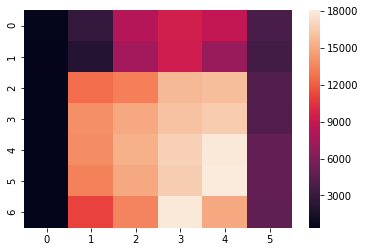

In [294]:
sns.heatmap(hm_data)

In [300]:
df2.head()

,STATION,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,DAY_OF_WEEK
0,1 AV,2018-05-19 00:00:00,1687.0,1107.0,5
1,1 AV,2018-05-19 04:00:00,673.0,1041.0,5
2,1 AV,2018-05-19 08:00:00,2864.0,3578.0,5
3,1 AV,2018-05-19 12:00:00,4839.0,5416.0,5
4,1 AV,2018-05-19 16:00:00,4982.0,6319.0,5


In [302]:
df3.head(20)

,STATION,DATETIME,ENTRY_DIFFS,EXIT_DIFFS,DAY_OF_WEEK,DATE,TIME
0,1 AV,2018-05-19 00:00:00,1687.0,1107.0,5,2018-05-19,00:00:00
1,1 AV,2018-05-19 04:00:00,673.0,1041.0,5,2018-05-19,04:00:00
2,1 AV,2018-05-19 08:00:00,2864.0,3578.0,5,2018-05-19,08:00:00
3,1 AV,2018-05-19 12:00:00,4839.0,5416.0,5,2018-05-19,12:00:00
4,1 AV,2018-05-19 16:00:00,4982.0,6319.0,5,2018-05-19,16:00:00
5,1 AV,2018-05-19 20:00:00,4196.0,4518.0,5,2018-05-19,20:00:00
6,1 AV,2018-05-20 00:00:00,1633.0,1188.0,6,2018-05-20,00:00:00
7,1 AV,2018-05-20 04:00:00,457.0,725.0,6,2018-05-20,04:00:00
8,1 AV,2018-05-20 08:00:00,2079.0,2423.0,6,2018-05-20,08:00:00
9,1 AV,2018-05-20 12:00:00,3946.0,4543.0,6,2018-05-20,12:00:00
